In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [3]:
!pip install roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="LS42Q96CFCnmVZ6cfMV7")
project = rf.workspace("data-preparation-model-training-integration-with-ai-pipelines").project("cctv_car_bike_detection-fhqk8-apu25")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cctv_car_bike_detection-1 in yolov8:: 100%|██████████| 2058/2058 [00:00<00:00, 7326.08it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 192MB/s]
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/cctv_car_bike_detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

In [6]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/4 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 4 carss, 1 motorbike, 63.3ms
image 2/4 /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg: 448x640 4 carss, 26.7ms
image 3/4 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 3 carss, 26.6ms
image 4/4 /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg: 448x640 10 carss, 26.7ms
Speed: 2.9ms preprocess, 35.8ms inference, 140.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


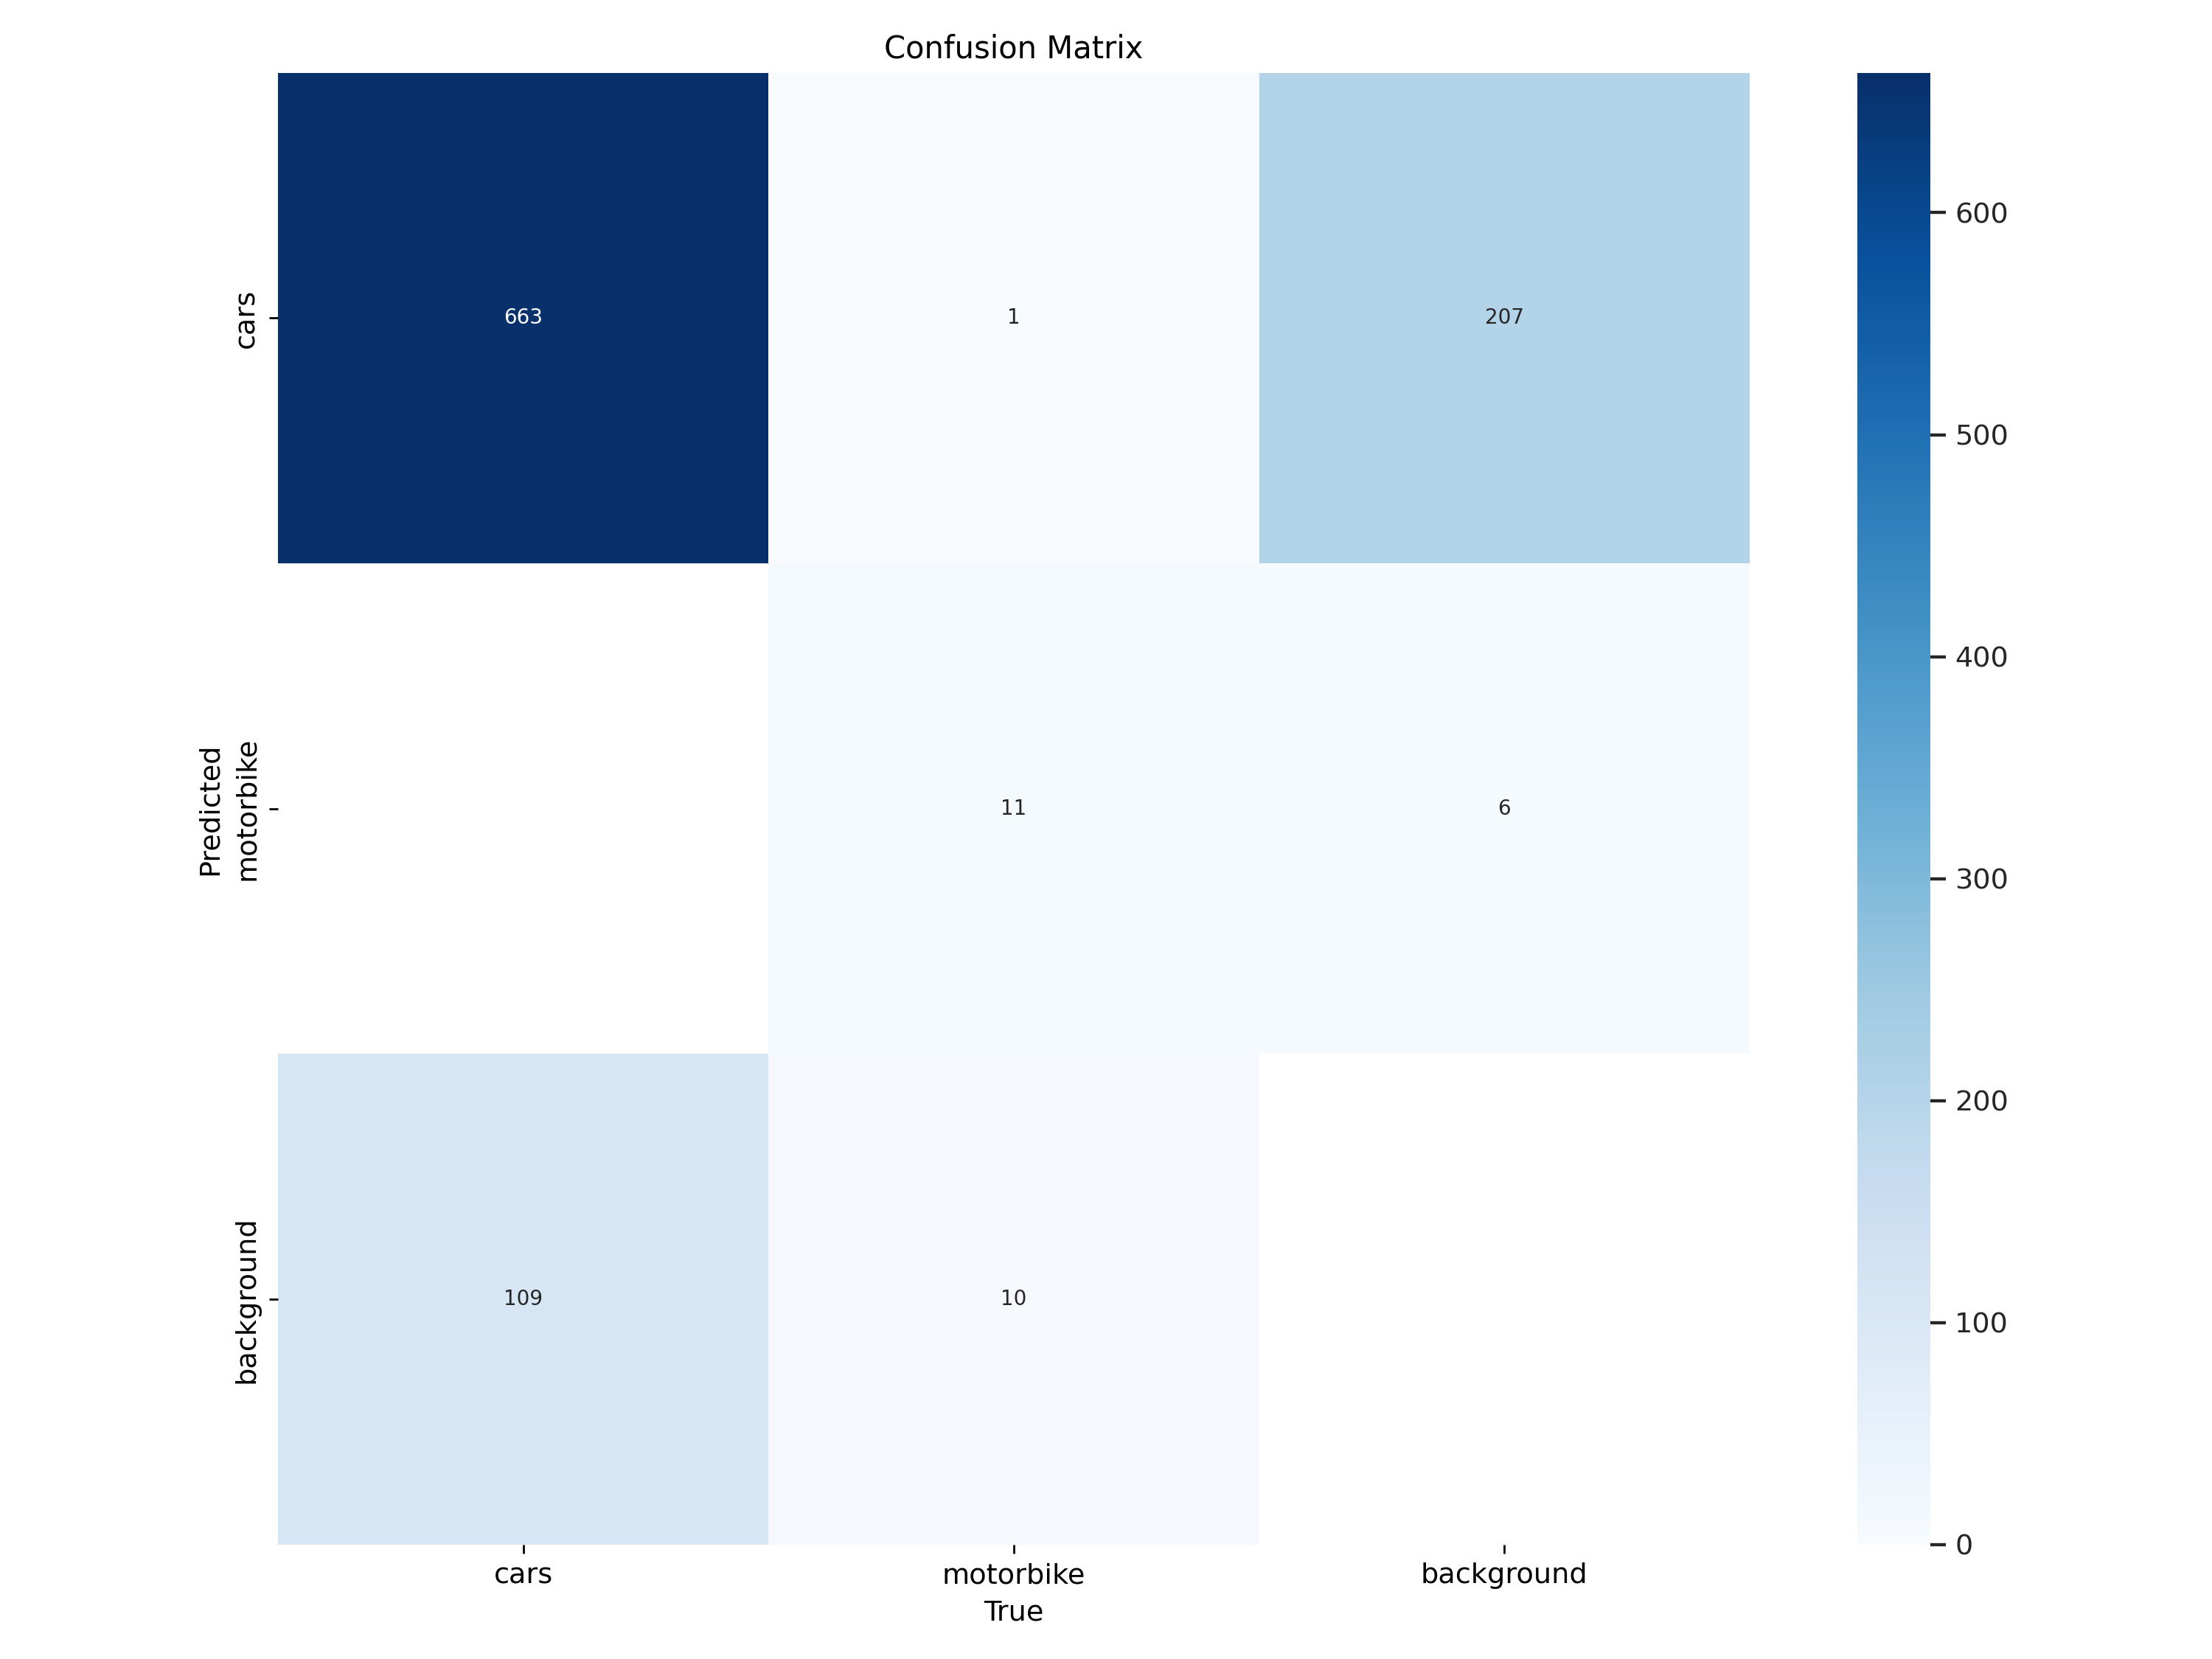

In [7]:
from IPython.display import display # Import the display function (may already be imported)
from PIL import Image

img = Image.open(f"/content/runs/detect/train/confusion_matrix.png")
img.show()  # To display the image using PIL's show()
# or
display(img)

In [8]:

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/cctv_car_bike_detection-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.22it/s]
                   all         33        794      0.784      0.631      0.666      0.302
                  cars         33        772      0.848      0.761      0.839      0.379
             motorbike         12         22      0.719        0.5      0.493      0.225
Speed: 3.3ms preprocess, 21.0ms inference, 0.0ms loss, 17.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
from ultralytics import YOLO

# Load YOLOv8s Pretrained Model
model = YOLO("yolov8s.pt")  # YOLOv8 Small model

# Train the model on the custom dataset
results = model.train(
    data=dataset.location + "/data.yaml",  # Corrected path to your data.yaml file
    epochs=10,                  # Number of epochs
    imgsz=640,                  # Image size
    batch=16,                   # Batch size
    name="custom-yolo-training"  # Experiment name
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 245MB/s]


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/cctv_car_bike_detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom-yolo-training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/cctv_car_bike_detection-1/train/labels.cache... 986 images, 0 backgrounds, 0 corrupt: 100%|██████████| 986/986 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/cctv_car_bike_detection-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]


Plotting labels to runs/detect/custom-yolo-training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/custom-yolo-training
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.07G      1.563      2.272      1.582         22        640: 100%|██████████| 62/62 [00:23<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         33        794      0.432      0.324      0.277      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.05G      1.555      1.335      1.558         10        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         33        794      0.351      0.343      0.368      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.87G      1.592      1.305      1.604         36        640: 100%|██████████| 62/62 [00:20<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         33        794      0.373      0.338      0.377      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.06G      1.594      1.226      1.603         11        640: 100%|██████████| 62/62 [00:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         33        794      0.356      0.432      0.386      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.05G      1.515      1.115      1.556         48        640: 100%|██████████| 62/62 [00:20<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         33        794      0.548      0.633      0.631      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.11G      1.492      1.019      1.494         44        640: 100%|██████████| 62/62 [00:20<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         33        794      0.557      0.615      0.572      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.97G      1.394     0.9052      1.461         10        640: 100%|██████████| 62/62 [00:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         33        794      0.758       0.67       0.69      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.97G      1.357     0.8401      1.405         12        640: 100%|██████████| 62/62 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         33        794      0.806       0.65      0.705       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.78G       1.27     0.7574       1.34         12        640: 100%|██████████| 62/62 [00:20<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         33        794      0.789       0.66      0.709      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.04G      1.255     0.7036      1.327         10        640: 100%|██████████| 62/62 [00:20<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         33        794      0.784      0.659      0.713      0.349



10 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/custom-yolo-training/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/custom-yolo-training/weights/best.pt, 22.5MB

Validating runs/detect/custom-yolo-training/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]


                   all         33        794      0.784      0.662      0.713      0.348
                  cars         33        772      0.797      0.779      0.834      0.392
             motorbike         12         22      0.771      0.545      0.592      0.303
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/custom-yolo-training


In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/4 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 4 carss, 1 motorbike, 61.8ms
image 2/4 /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg: 448x640 4 carss, 26.7ms
image 3/4 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 3 carss, 26.6ms
image 4/4 /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg: 448x640 10 carss, 26.6ms
Speed: 2.5ms preprocess, 35.4ms inference, 168.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


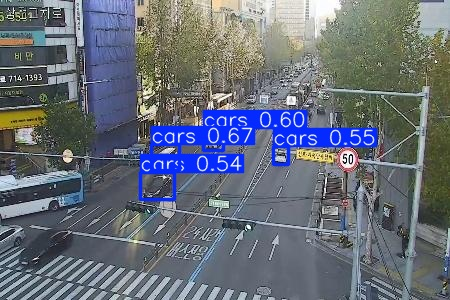

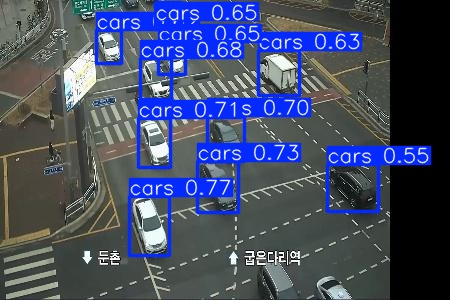

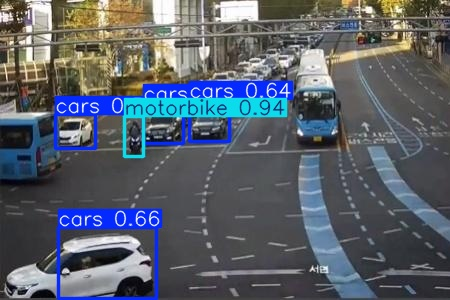

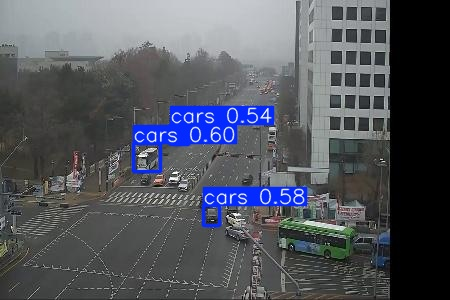

In [11]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
	display(Image(filename=image_path, height=600))
	print("\n")

In [12]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluate the model
metrics = model.val()
print(metrics)

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/cctv_car_bike_detection-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]


                   all         33        794      0.784      0.631      0.666      0.302
                  cars         33        772      0.848      0.761      0.839      0.379
             motorbike         12         22      0.719        0.5      0.493      0.225
Speed: 0.2ms preprocess, 21.8ms inference, 0.4ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4a7b221490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

Selected image: /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 15 carss, 29.4ms
Speed: 3.0ms preprocess, 29.4ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4


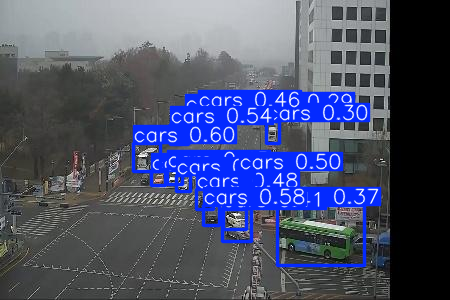

In [15]:
import glob
from PIL import Image # Import Image from PIL
from IPython.display import display

# Construct the correct path to the test images
test_images_path = os.path.join(dataset.location, 'test', 'images', '*.jpg')

# Get a list of all image files in the test directory
image_files = glob.glob(test_images_path)

# Check if any images were found
if not image_files:
    print("No images found in the test directory.")
else:
    # Select a random image
    random_image = random.choice(image_files)
    print(f"Selected image: {random_image}")

    # Run inference on the selected image
    model = YOLO('/content/runs/detect/train/weights/best.pt')
    results = model.predict(source=random_image, save=True)

    # Display the results
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image # Using PIL.Image.fromarray
        display(im)

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg: 448x640 11 carss, 27.6ms
Speed: 1.9ms preprocess, 27.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


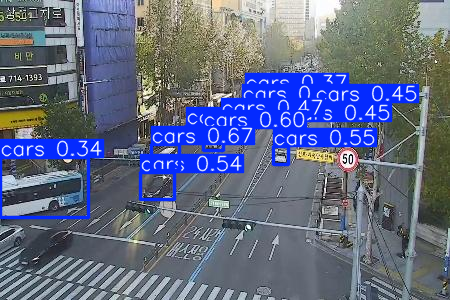

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg: 448x640 13 carss, 1 motorbike, 27.5ms
Speed: 1.9ms preprocess, 27.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict6


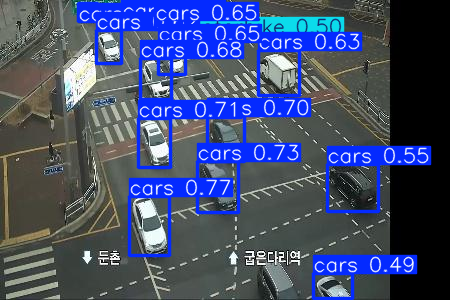

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 11 carss, 1 motorbike, 27.5ms
Speed: 2.0ms preprocess, 27.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7


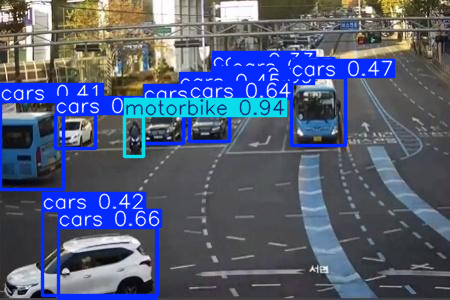

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 15 carss, 27.5ms
Speed: 1.9ms preprocess, 27.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict8


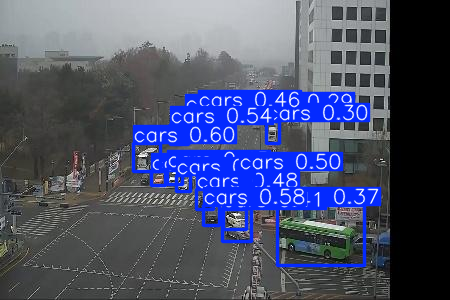

In [16]:
# prompt: perform the same function which you performed upper cell but on different images
import os
import random
# Construct the correct path to the test images
test_images_path = os.path.join(dataset.location, 'test', 'images', '*.jpg')

# Get a list of all image files in the test directory
image_files = glob.glob(test_images_path)

# Check if any images were found
if not image_files:
    print("No images found in the test directory.")
else:
    # Loop through each image file
    for image_file in image_files:
        print(f"Processing image: {image_file}")

        # Run inference on the current image
        model = YOLO('/content/runs/detect/train/weights/best.pt')
        results = model.predict(source=image_file, save=True)

        # Display the results for the current image
        for r in results:
            im_array = r.plot()  # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image # Using PIL.Image.fromarray
            display(im)

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg: 448x640 11 carss, 28.3ms
Speed: 2.0ms preprocess, 28.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict9


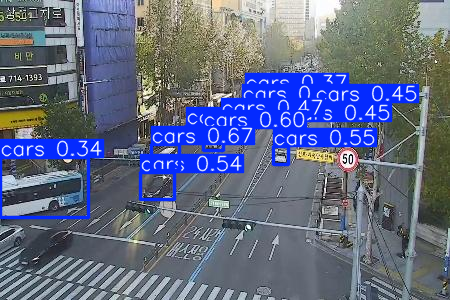

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg: 448x640 13 carss, 1 motorbike, 27.5ms
Speed: 1.9ms preprocess, 27.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict10


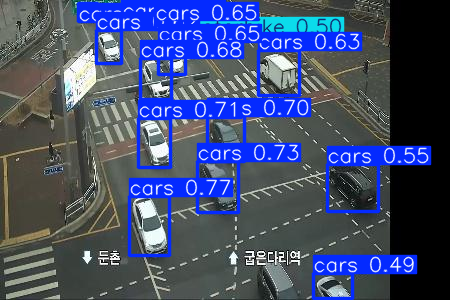

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 11 carss, 1 motorbike, 27.8ms
Speed: 2.3ms preprocess, 27.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict11


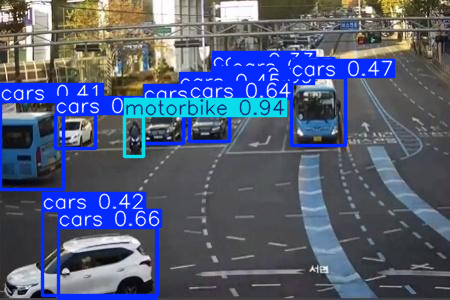

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 15 carss, 27.5ms
Speed: 2.0ms preprocess, 27.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict12


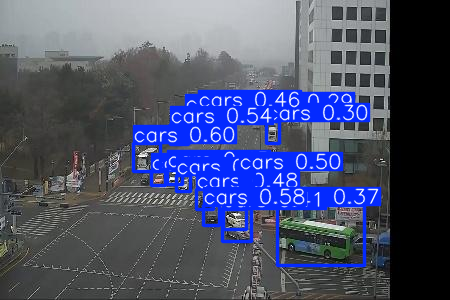

In [17]:
# prompt: perform the same function which you performed upper cell but on different images

import random
# Construct the correct path to the test images
test_images_path = os.path.join(dataset.location, 'test', 'images', '*.jpg')

# Get a list of all image files in the test directory
image_files = glob.glob(test_images_path)

# Check if any images were found
if not image_files:
    print("No images found in the test directory.")
else:
    # Loop through each image file
    for image_file in image_files:
        print(f"Processing image: {image_file}")

        # Run inference on the current image
        model = YOLO('/content/runs/detect/train/weights/best.pt')
        results = model.predict(source=image_file, save=True)

        # Display the results for the current image
        for r in results:
            im_array = r.plot()  # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image # Using PIL.Image.fromarray
            display(im)

In [ ]:
# prompt: tell me something about this model is it good or not?

The code you provided uses the Ultralytics YOLOv8 library to train an object detection model on a custom dataset from Roboflow, then performs inference on test images.  Let's break down its strengths and weaknesses:

**Strengths:**

* **Uses a powerful library:** Ultralytics YOLOv8 is a state-of-the-art object detection model known for its speed and accuracy.
* **Roboflow integration:**  Using Roboflow simplifies dataset management and preprocessing.  This is a significant advantage as data preparation is crucial for good model performance.
* **Comprehensive training and evaluation:**  The code trains the model, evaluates it using `model.val()`, and displays the metrics.  It also demonstrates how to visualize the confusion matrix.
* **Clear inference steps:** The code clearly shows how to load a trained model and perform inference on both a single image and a set of images, displaying the results visually.
* **Error Handling:** Includes checks for the existence of test images.


**Weaknesses and Areas for Improvement:**

* **Redundant Code:**  The code repeats the inference loop three times. This is highly inefficient.  It should be refactored to a single function.
* **Hardcoded Paths:** Paths are hardcoded, making the code less reusable. It would be better to define variables for the dataset location and model output paths and use those consistently.
* **Limited Hyperparameter Tuning:** The code uses fixed hyperparameters (epochs, imgsz, batch size).  Optimal performance often requires more careful hyperparameter tuning.
* **No Clear Visualization of Metrics:** While the code displays the confusion matrix, it doesn't provide a clear interpretation of the results. Adding more detailed analysis of the metrics (precision, recall, F1-score) would be helpful.
* **Missing Cleanup:**  The code doesn't include any cleanup steps (like deleting temporary files). This can lead to increased storage usage, especially if running repeatedly.
* **`img.show()` vs `display(img)`**:  The code uses both `img.show()` (which may not always work in Colab) and `display(img)`.  Stick with `display(img)` as it is more reliable in Jupyter and Colab environments.

**Recommendations:**

1. **Refactor the code:** Create functions for training, evaluation, and prediction to avoid redundancy.
2. **Use parameters:** Make paths, hyperparameters, and model names configurable using parameters or a configuration file.
3. **Implement hyperparameter tuning:** Explore different hyperparameters to optimize the model's performance (using techniques like grid search or random search).
4. **Detailed metric analysis:** Calculate and display precision, recall, F1-score, mAP, and other relevant metrics. Visualize these metrics with plots or charts.
5. **Cleanup temporary files:** Add code to delete temporary files generated during training and prediction.
6. **Consistent Display Method:** Only use `display(img)` to show images.

By addressing these issues, the code will be significantly improved in terms of readability, reusability, efficiency, and the clarity of results.


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/cctv_car_bike_detection-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


                   all         33        794      0.784      0.631      0.666      0.302
                  cars         33        772      0.848      0.761      0.839      0.379
             motorbike         12         22      0.719        0.5      0.493      0.225
Speed: 0.3ms preprocess, 16.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d48a8592ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

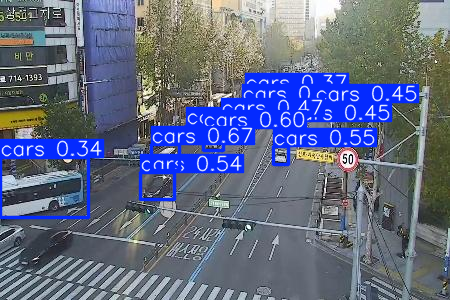

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg: 448x640 13 carss, 1 motorbike, 27.2ms
Speed: 3.3ms preprocess, 27.2ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict14


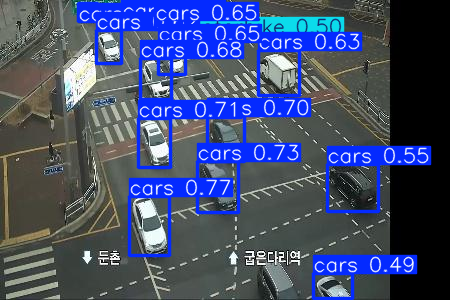

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 11 carss, 1 motorbike, 28.6ms
Speed: 3.1ms preprocess, 28.6ms inference, 5.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict14


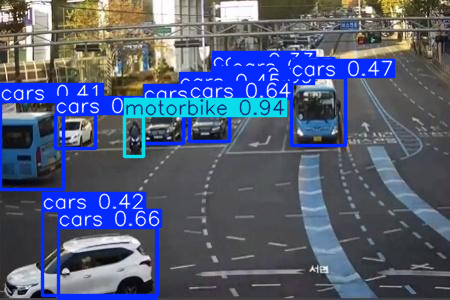

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 15 carss, 27.5ms
Speed: 3.0ms preprocess, 27.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict14


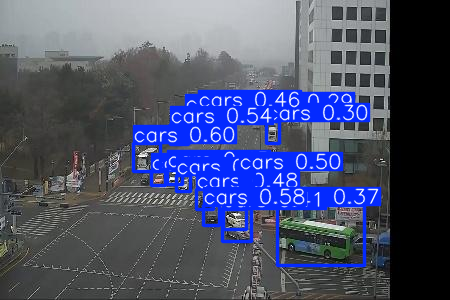

Selected image: /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-5_610_jpg.rf.bf9675c0dd1ed4357279f046550436a9.jpg: 448x640 11 carss, 26.8ms
Speed: 4.4ms preprocess, 26.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict14


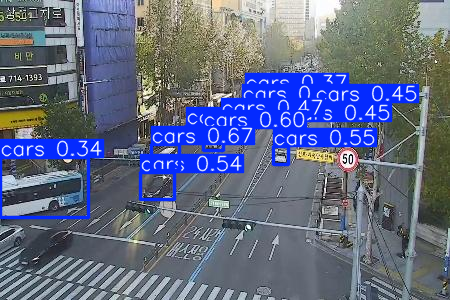

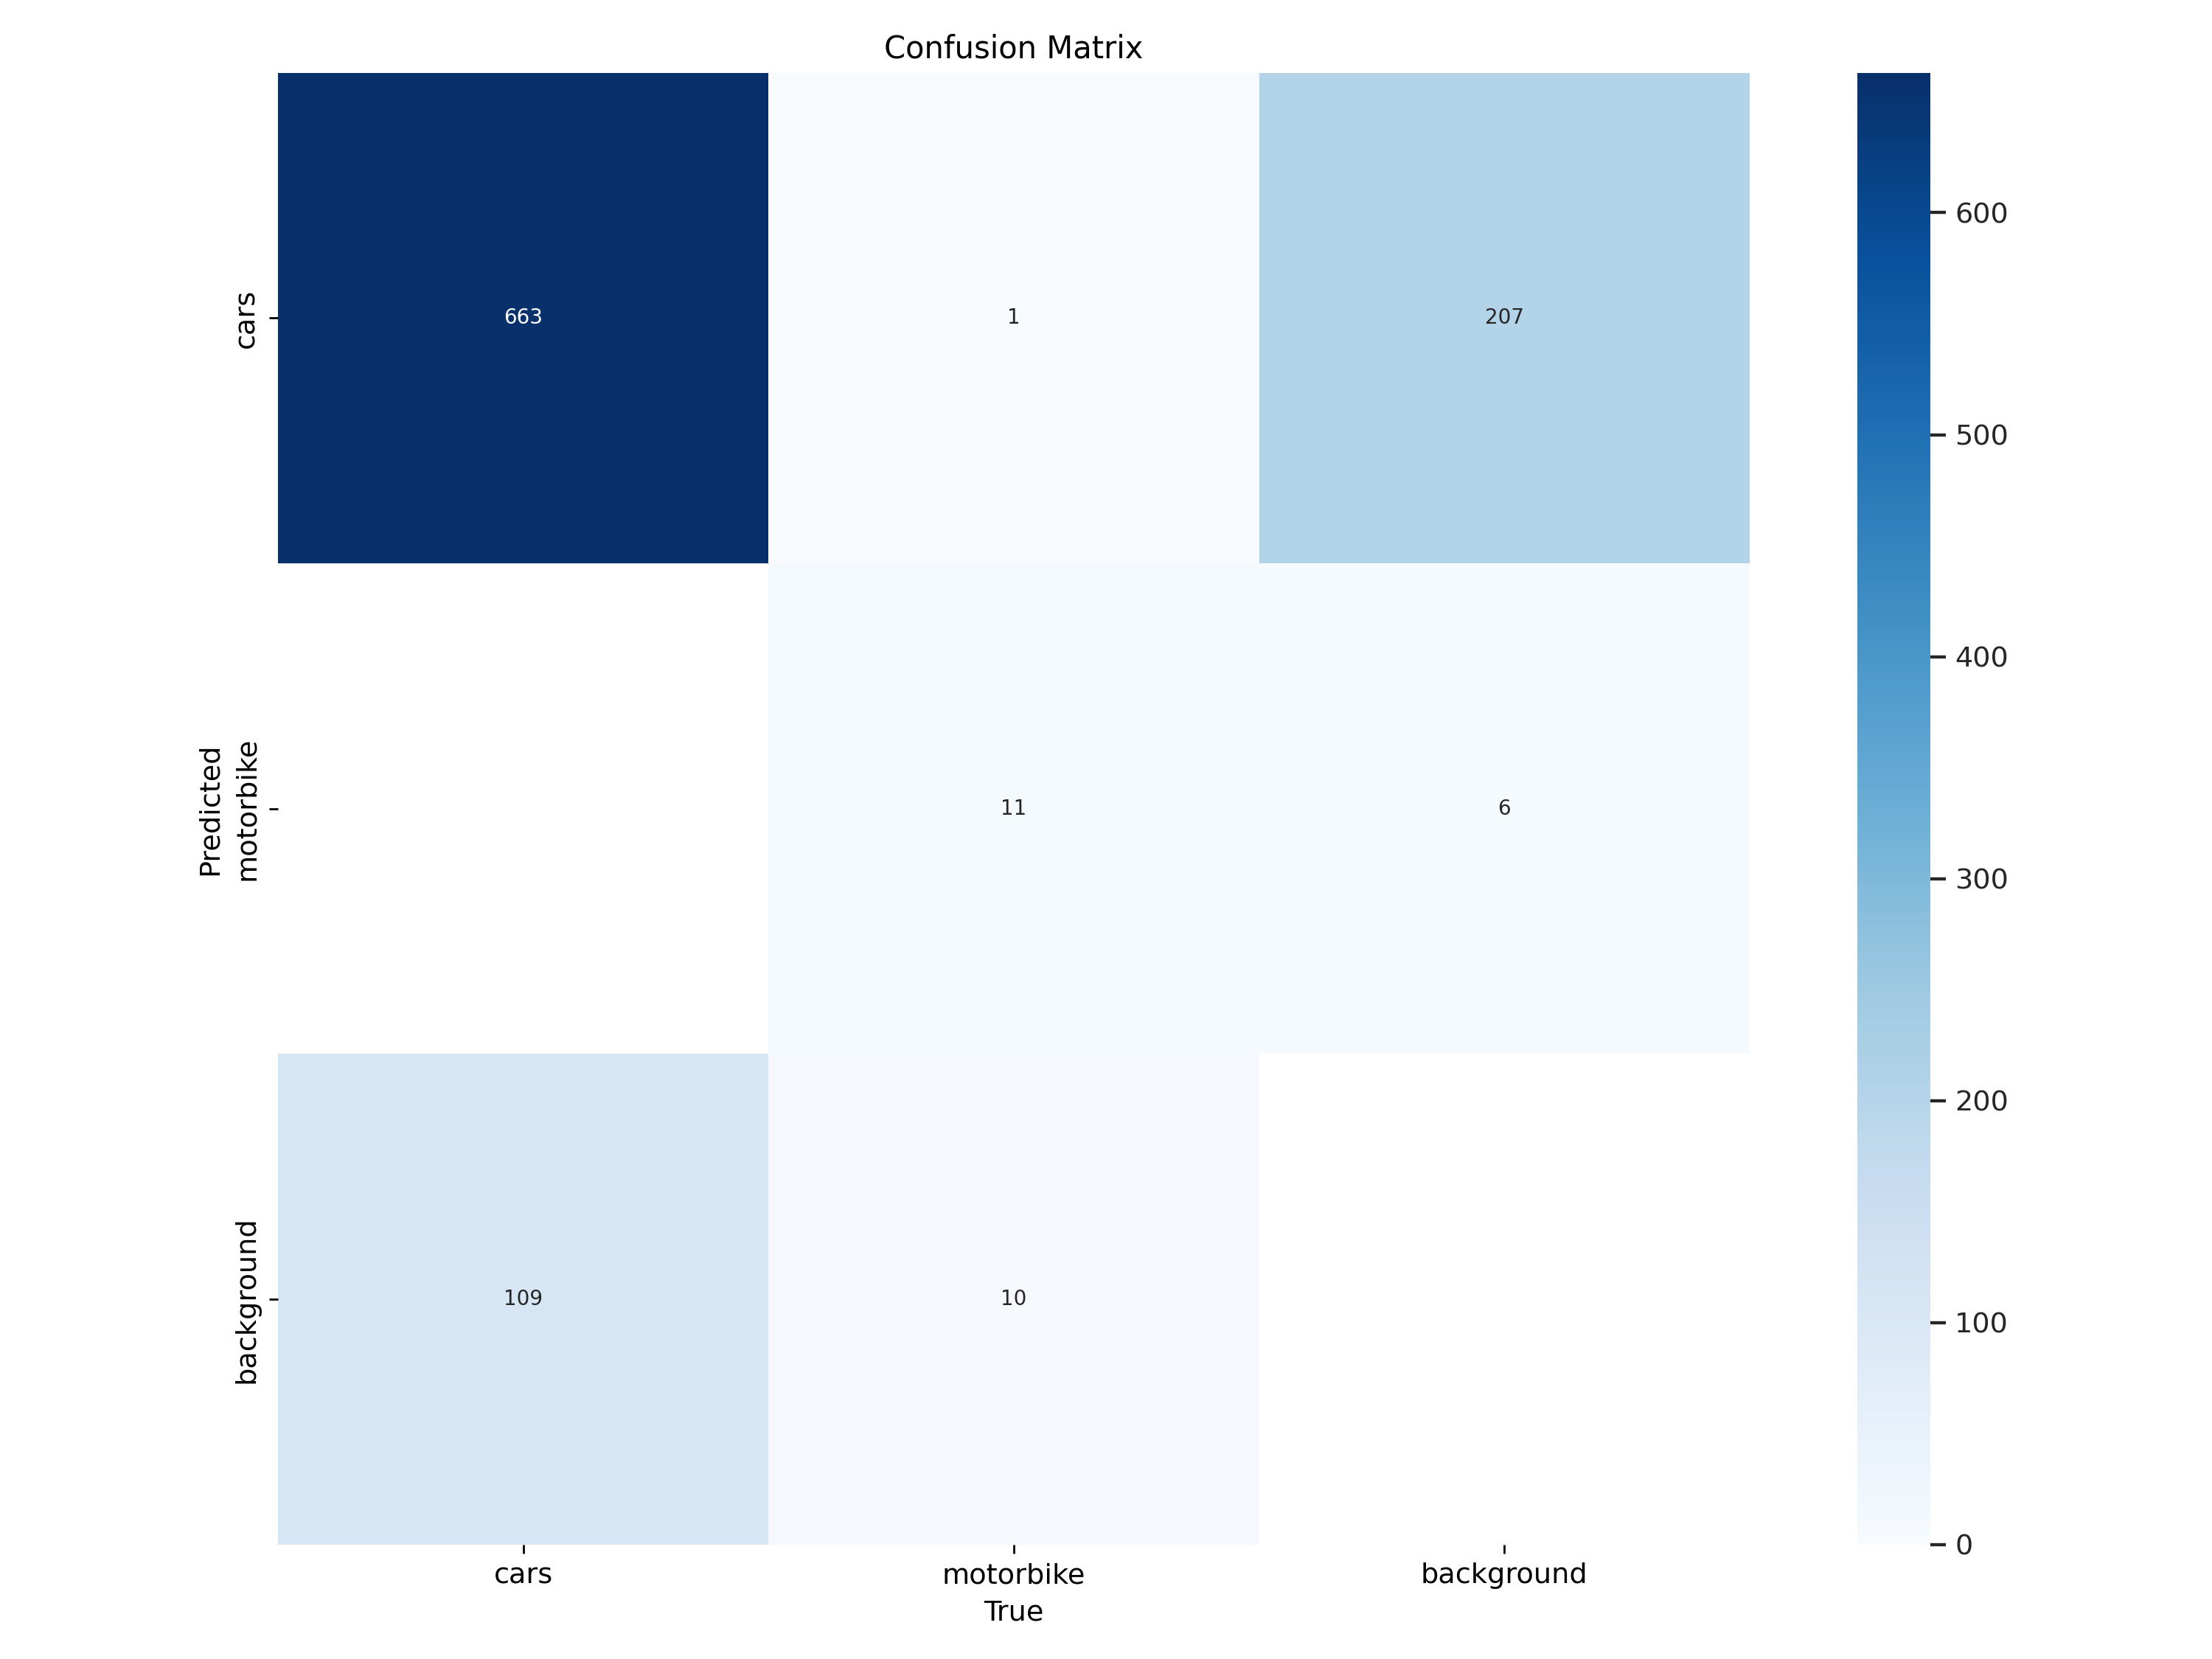

In [19]:



model = YOLO(MODEL_PATH)

# Evaluate the model and print detailed metrics
metrics = model.val()
print(metrics)
print(f"Precision: {metrics.box.p}")
print(f"Recall: {metrics.box.r}")
print(f"F1-score: {metrics.box.f1}")
print(f"mAP@0.5: {metrics.box.map50}")


# --- Prediction and Visualization ---
def predict_and_display(image_path):
    results = model.predict(source=image_path, save=True)
    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])
        display(im)

# Predict on all test images
test_images_path = os.path.join(dataset.location, 'test', 'images', '*.jpg')
image_files = glob.glob(test_images_path)

if image_files:
  for image_file in image_files:
    print(f"Processing image: {image_file}")
    predict_and_display(image_file)
else:
  print("No images found in the test directory.")

#Example prediction on a single random image:
if image_files:
    random_image = random.choice(image_files)
    print(f"Selected image: {random_image}")
    predict_and_display(random_image)
else:
    print("No images found in the test directory.")


# Display the confusion matrix
try:
    img = Image.open(f"/content/runs/detect/train/confusion_matrix.png")
    display(img)
except FileNotFoundError:
    print("Confusion matrix image not found.")

loading Roboflow workspace...
loading Roboflow project...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/cctv_car_bike_detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom-yolo-training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

val: Scanning /content/cctv_car_bike_detection-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


                   all         33        794      0.784      0.631      0.666      0.302
                  cars         33        772      0.848      0.761      0.839      0.379
             motorbike         12         22      0.719        0.5      0.493      0.225
Speed: 0.3ms preprocess, 19.0ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val6
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4998bd2ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

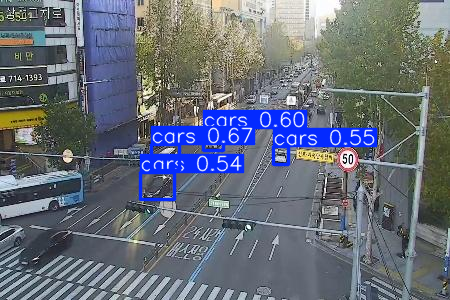

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-7_54_jpg.rf.8178506abab2a12507e01359989349cf.jpg: 448x640 10 carss, 27.2ms
Speed: 2.9ms preprocess, 27.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict15


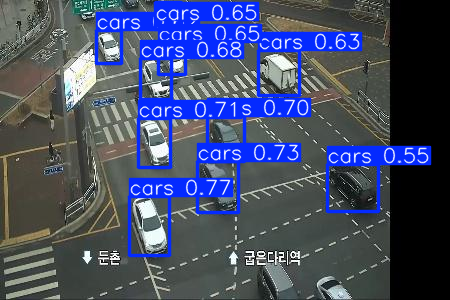

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 4 carss, 1 motorbike, 25.9ms
Speed: 2.9ms preprocess, 25.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict15


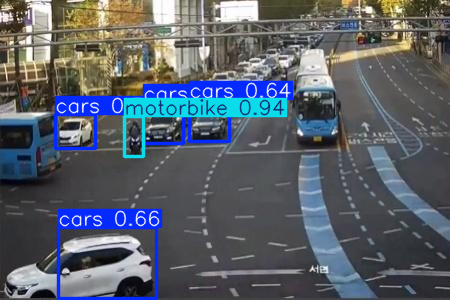

Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-6_52_jpg.rf.3e6ced80c85b8e9e45b36d738821e5d9.jpg: 448x640 3 carss, 24.9ms
Speed: 3.1ms preprocess, 24.9ms inference, 4.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict15


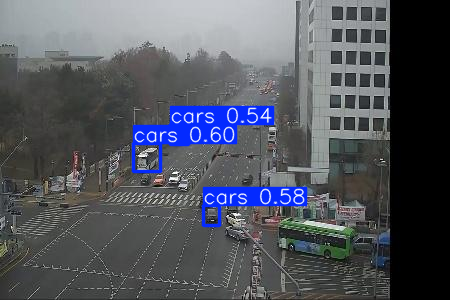

Selected image: /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg
Processing image: /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg

image 1/1 /content/cctv_car_bike_detection-1/test/images/CCTV-10_95_jpg.rf.6490886c43ebdcef0b58d736d58798c6.jpg: 448x640 4 carss, 1 motorbike, 25.1ms
Speed: 2.4ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict16


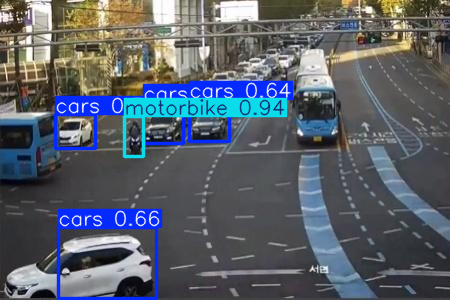

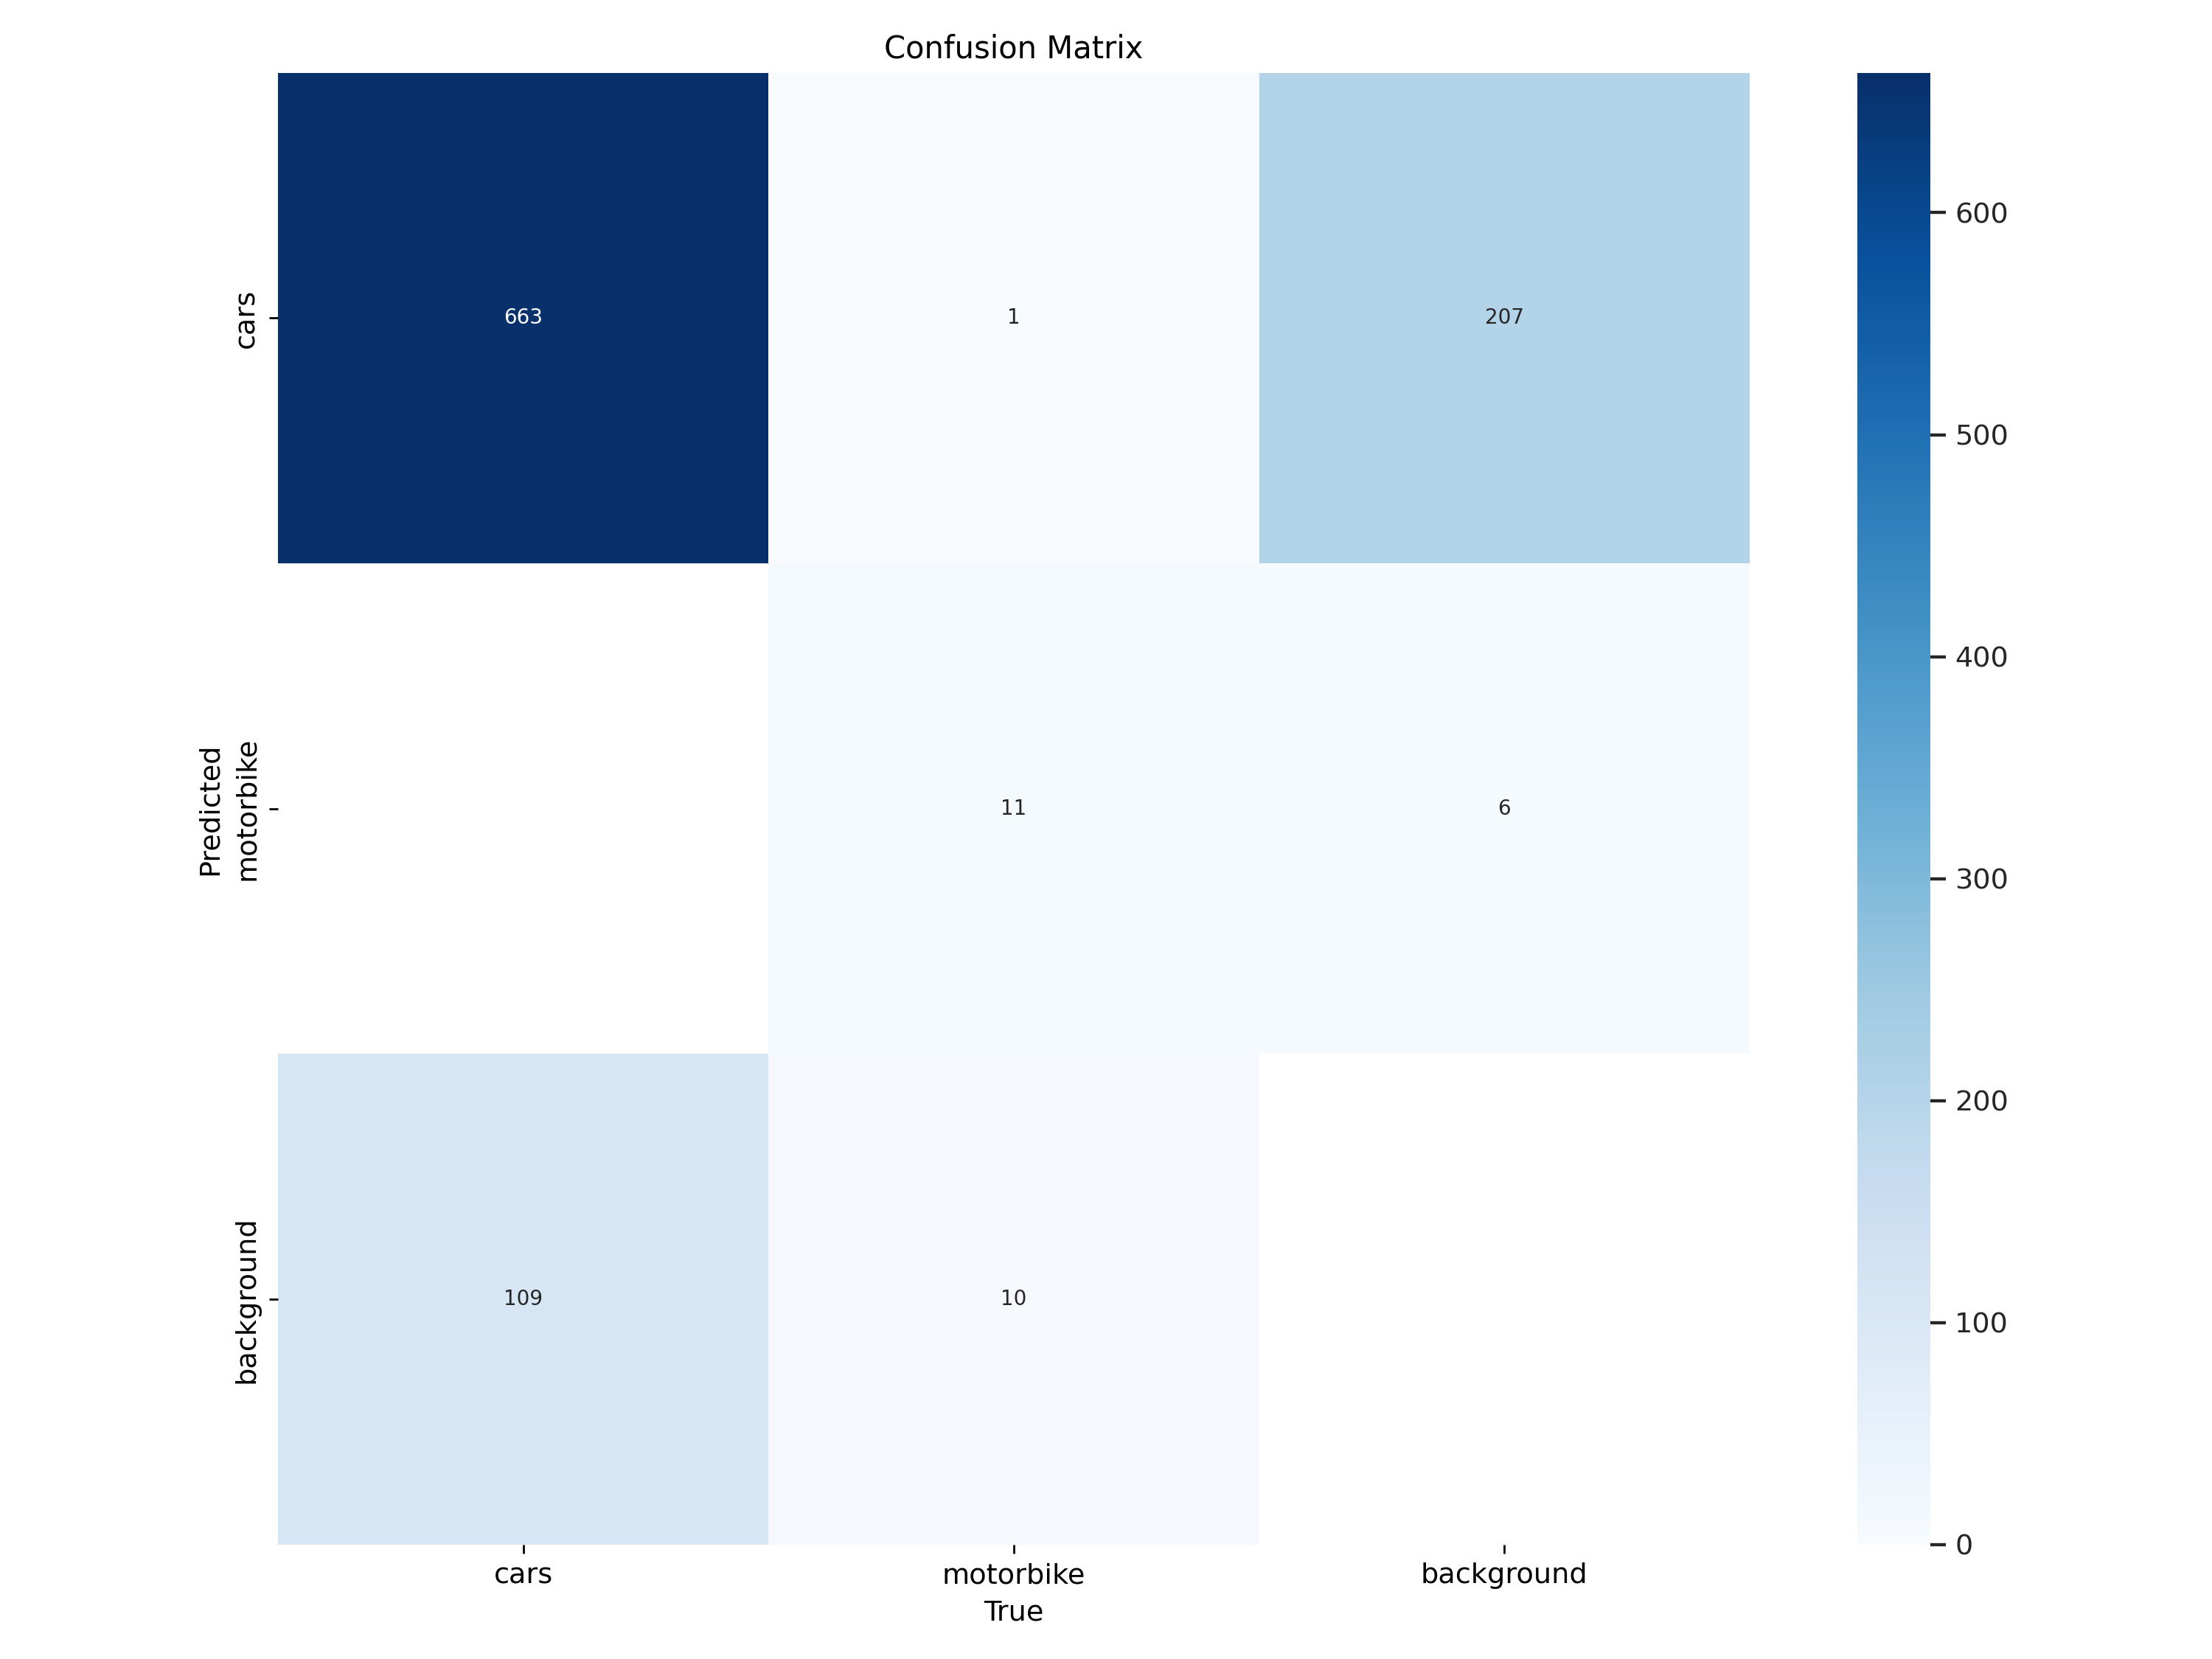

In [21]:
# prompt: Refactor the code:** Create functions for training, evaluation, and prediction to avoid redundancy

import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow
import glob
from PIL import Image
import os
import random

# Install necessary libraries
!pip install ultralytics roboflow

# Initialize Roboflow
rf = Roboflow(api_key="LS42Q96CFCnmVZ6cfMV7")
project = rf.workspace("data-preparation-model-training-integration-with-ai-pipelines").project("cctv_car_bike_detection-fhqk8-apu25")
version = project.version(1)
dataset = version.download("yolov8")

# Define paths and parameters
DATASET_LOCATION = dataset.location
MODEL_PATH = "/content/runs/detect/train/weights/best.pt"
CONFIDENCE_THRESHOLD = 0.5

def train_model(data_yaml, epochs=10, imgsz=640, batch=16, model_name="yolov8m.pt", experiment_name="custom-yolo-training"):
    !yolo task=detect mode=train model={model_name} data={data_yaml} epochs={epochs} imgsz={imgsz} batch={batch} name={experiment_name}

def evaluate_model(data_yaml, model_path):
    metrics = YOLO(model_path).val(data=data_yaml)
    print(metrics)
    print(f"Precision: {metrics.box.p}")
    print(f"Recall: {metrics.box.r}")
    print(f"F1-score: {metrics.box.f1}")
    print(f"mAP@0.5: {metrics.box.map50}")
    return metrics


def predict_on_images(model_path, image_paths, conf=CONFIDENCE_THRESHOLD):
    model = YOLO(model_path)
    for image_path in image_paths:
        print(f"Processing image: {image_path}")
        results = model.predict(source=image_path, save=True, conf=conf)
        for r in results:
            im_array = r.plot()
            im = Image.fromarray(im_array[..., ::-1])
            display(im)

# Main execution
train_model(f"{DATASET_LOCATION}/data.yaml")

# Evaluate the model
evaluate_model(f"{DATASET_LOCATION}/data.yaml", MODEL_PATH)

# Perform prediction
test_images_path = os.path.join(DATASET_LOCATION, 'test', 'images', '*.jpg')
image_files = glob.glob(test_images_path)
if image_files:
    predict_on_images(MODEL_PATH, image_files)

    #Example prediction on a single random image
    random_image = random.choice(image_files)
    print(f"Selected image: {random_image}")
    predict_on_images(MODEL_PATH, [random_image])
else:
    print("No images found in the test directory.")


# Display the confusion matrix
try:
    img = Image.open(f"/content/runs/detect/train/confusion_matrix.png")
    display(img)
except FileNotFoundError:
    print("Confusion matrix image not found.")